In [5]:
import sys
sys.path.insert(0,'/home/james/eclipse-workspace/qubiclmou/qubic/')

import os
import qubic
import healpy as hp
import numpy as np
import pylab as plt
import matplotlib as mpl

In [6]:
# This code plots the beam profiles for the 3 possible values of the
# dictionary entry 'beam_shape' at 150 and 220 GHz'

d = qubic.qubicdict.qubicDict()

# Choose her your favourite dictionary 
# d.read_from_file(sys.argv[1])
d.read_from_file('global_test.dict')

# number of sub frequencies to be plotted for  'multi_freq'  beam
# can be chosen arbitrarily
d['nf_sub'] = 3

theta_max = 30
theta_deg = (np.arange(101)-50) * 0.6
theta = abs(np.deg2rad(theta_deg))
nubands = ['150', '220']
beam_shapes = [ 'gaussian', 'fitted_beam', 'multi_freq']

beam_dict = {'gaussian':  'Gaussian', 'fitted_beam': 'Multi-gaussian fitted',
                       'multi_freq': 'Multifrequency spline fitted'}

In [7]:
beam_shapes

['gaussian', 'fitted_beam', 'multi_freq']

150 gaussian
220 gaussian
150 fitted_beam
220 fitted_beam
Close the figures to end


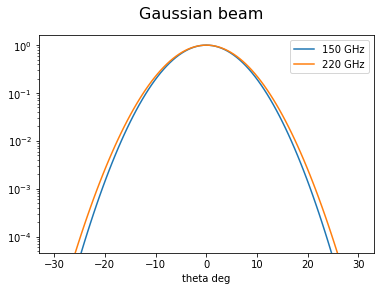

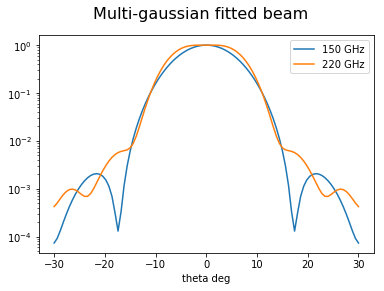

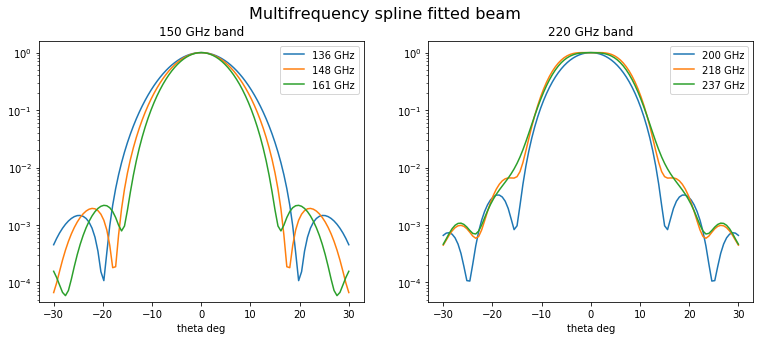

In [8]:
# Loop on beam shapes
for bs in beam_shapes:
    d['beam_shape'] = bs
    beam_profile = beam_dict[bs]  + ' beam'

    if (d['beam_shape'] == 'gaussian') or  (d['beam_shape'] == 'fitted_beam'):
        plt.figure(d['beam_shape'])
        # Loop on 150 and 220 GHz frequency bands
        for inu, nu_band in enumerate(nubands) :
            d['filter_nu'] = float(nu_band) * 1e9
            print nu_band, d['beam_shape']
            q = qubic.QubicInstrument(d)
            plt.semilogy(theta_deg, q.primary_beam(theta, 0), label=nu_band+' GHz' )
            plt.legend(loc='best')
            plt.xlabel('theta deg')
            plt.ylim(4.6e-5, 1.6)
        plt.suptitle(beam_profile, fontsize=16)
    elif d['beam_shape'] =='multi_freq':
        plt.figure(d['beam_shape'], figsize=[12.8, 4.8])        
        # Loop on 150 and 220 GHz frequency bands
        for inu, nu_band in enumerate(nubands) :
            d['filter_nu'] = float(nu_band) * 1e9
            # Creation of a multi-band-instrument with d['nf_sub']  sub-bands
            q = qubic.QubicMultibandInstrument(d)
            isub = inu+1
            plt.subplot(1,2,isub)
            # Loop on the sub-bands
            for i in xrange(len(q)):
                nu = str(int(q[i].filter.nu / 1e9)) + ' GHz'
                plt.semilogy(theta_deg, q[i].primary_beam(theta, 0), label=nu )
                plt.legend(loc='best')
                plt.xlabel('theta deg')
                plt.title(nu_band + ' GHz band')
                plt.ylim(4.6e-5, 1.6)
        plt.suptitle(beam_profile, fontsize=16)        

print 'Close the figures to end'
plt.show()
